# General system and one Buttiker lead added.

In [1]:
import kwant
import math
import cmath
from matplotlib import pyplot as plt
import numpy as np
import tinyarray


from scipy import optimize
import scipy
import time
sigma_0 = tinyarray.array([[1, 0], [0, 1]])
sigma_x = tinyarray.array([[0, 1], [1, 0]])
sigma_y = tinyarray.array([[0, -1j], [1j, 0]])
sigma_z = tinyarray.array([[1, 0], [0, -1]])

In [2]:
import sys
sys.path.insert(0, '/Users/khhuisman/Downloads/CISS_effect-main 2/Modules')

In [3]:
import CalculateCurrentN

#### Root finding methods

In [4]:
import Self_consistency_Buttiker_V_Probe

### System

In [5]:
import GoldLeadsSystem_1Probe

In [6]:
def func_molecule(nrings,chirality_left):
    
    if chirality_left == True:
        return '[{}]M-Helicene'.format(nrings)
    
    if chirality_left == False:
        return '[{}]P-Helicene'.format(nrings)

In [7]:
def make_system(B=1, u0 = -5.3,t0 =50,
                     nlayers = 3, xi_d = 0.6, xi_p = 0.006,
                    Txz = 3,Tyz = 3,d_L= 50,
                    txz_left_1=1,tyz_left_1=0,
                    txz_left_2=1,tyz_left_2=1,
                    txz_left_3=0,tyz_left_3=1,
                    plot_left = False,
                    txz_right_1=1,tyz_right_1=0, 
                    txz_right_2=1,tyz_right_2=1,
                    txz_right_3=0,tyz_right_3=1,
                    plot_right = False,
                    nrings =6 ,tvec=3,E_z=0,r=1.4,zstart=0,b=3.6,
                    chirality_left=False,
                    u=-18+9.9 ,delta_e=-12.6,Es=-6.21,I=5,M=1,E1=0,E2=0
                     ):
    
    system = GoldLeadsSystem_1Probe.make_system_toy_1B_right(nlayers, xi_d,xi_p,
                Txz,Tyz, d_L,
                 txz_left_1,tyz_left_1,
                txz_left_2,tyz_left_2,
                txz_left_3,tyz_left_3,
                plot_left,
                txz_right_1,tyz_right_1, 
                txz_right_2,tyz_right_2,
                txz_right_3,tyz_right_3,
                plot_right,
                nrings ,tvec,E_z,r,zstart,b,
                chirality_left,
                u,delta_e,Es,
                B,u0,t0,I,M,E1,E2)
    
    
    
    systemf = system.finalized()
    return systemf

# Define Systems

#### Set system parameters

In [8]:
# chirality_left:
# True = M-helicene
# False = P-helicene

In [9]:
nleads,B,de,t0,u0,attpos , attposM  ,attposE1 , attposE2 = 3,1,0.012, 50,-5.3,5,1,0,0
nrings,chirality_left = 6, True

In [10]:
func_molecule(nrings,chirality_left)

'[6]M-Helicene'

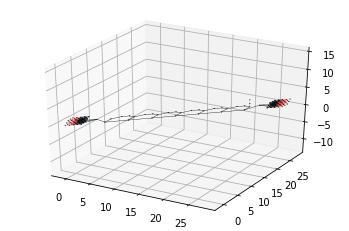

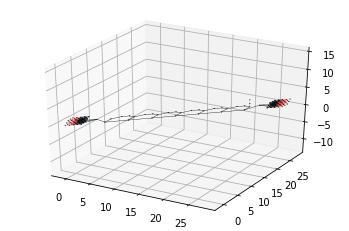

In [11]:
# total number of leads = L,R lead + "# Buttiker Probes"
nleads = 2+1 


#System with positive Magnetization
syst_Sgeom_P = make_system(B= abs(B),t0=t0,u0=u0,
                           nrings=nrings,chirality_left=chirality_left,
                           I=attpos ,
                           M =attposM  ,E1=attposE1 , E2=attposE2)
kwant.plot(syst_Sgeom_P,site_size=0.1,hop_lw=0.1);

#System with negative Magnetization
syst_Sgeom_M = make_system(B= -abs(B),t0=t0,u0=u0,I=attpos,
                           nrings=nrings,chirality_left=chirality_left,
                           M =attposM  ,E1=attposE1 , E2=attposE2)
kwant.plot(syst_Sgeom_M,site_size=0.1,hop_lw=0.1);

# Bias Window

In [12]:
# fix voltage and fermi energy
ef     = -5.3
Vmax   = 1.1
V_list = np.linspace(0,Vmax,20) 

Vbar_list = [-V for V in V_list]

# energies in the bias window
de =0.012
emin, emax = ef - Vmax/2 , ef + Vmax/2
print(emin,emax,de)

-5.85 -4.75 0.012


# Convergence criterium

In [13]:
tol = 10**-8

# Calculate transmissions

# $T_{ij}(m), T_{ji}(m)$

In [ ]:
energies,list_tags_transmissions_P,list_tags_transmissions_M =  Self_consistency_Buttiker_V_Probe.list_tag_transmission_functions(
                                                                                            nleads=nleads,
                                                                                                systf=syst_Sgeom_P,
                                                                                      emin=emin,emax=emax,de=de)

# Plot Transmissions

# $T_{ij}(m), T_{ji}(m)$

In [ ]:
CalculateCurrentN.plot_transmission_i(0,list_tags_transmissions_P,energies)


In [ ]:
CalculateCurrentN.plot_transmission_i(1,list_tags_transmissions_P,energies)

In [ ]:
CalculateCurrentN.plot_transmission_i(2,list_tags_transmissions_P,energies)


# $\mu(m,+V)$ 

In [32]:
muBs_P_sol_list = Self_consistency_Buttiker_V_Probe.muB_selfconsistent(ef,V_list,nleads,list_tags_transmissions_P,
                                         energies,syst_Sgeom_P,
                                          print_bool=True,tol = tol)

--- V = 0.0 --- 
[1.021405182655144e-14]
[1.021405182655144e-14]
[1.021405182655144e-14]
[2.449164604456655e-07]
[-0.015303947343965785]
--- mu2,mu3,... =[-5.3]
--- V = 0.05789473684210527 --- 
[0.022703572476007405]
[0.022703572476007405]
[0.022703572476007405]
[0.022703817392457637]
[-8.697992791506515e-05]
[6.710468751780496e-07]
[3.322919717163586e-11]
[-8.881784197001252e-16]
--- mu2,mu3,... =[-5.3072933]
--- V = 0.11578947368421054 --- 
[0.028008113848838168]
[0.028008113848838168]
[0.028008113848838168]
[0.028008361929054315]
[-0.000497122249468962]
[2.508626933606095e-05]
[5.8535660762970565e-09]
[-6.838973831690964e-14]
--- mu2,mu3,... =[-5.31607371]
--- V = 0.1736842105263158 --- 
[0.030672099161979105]
[0.030672099161979105]
[0.030672099161979105]
[0.03067236476643309]
[-0.0002149637057990983]
[7.181958290303214e-07]
[1.8466117523985304e-11]
[1.3322676295501878e-15]
--- mu2,mu3,... =[-5.32515811]
--- V = 0.23157894736842108 --- 
[0.0262500671113004]
[0.0262500671113004]
[0.0

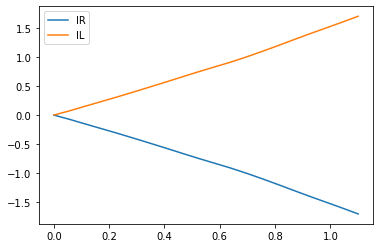

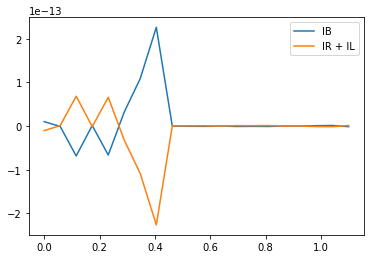

In [33]:
IP_list_0,IP_list_1, IP_list_2 = Self_consistency_Buttiker_V_Probe.currents_list(muBs_P_sol_list,V_list,
                                             ef,nleads,list_tags_transmissions_P,energies,
                                                                                  syst_Sgeom_P)

# $\bar{\mu}_B(m,-V) $

In [34]:
mubarBs_P_sol_list = Self_consistency_Buttiker_V_Probe.muB_selfconsistent(ef,Vbar_list,nleads,list_tags_transmissions_P,
                                        energies,syst_Sgeom_P,
                                          print_bool=True,tol = tol)

--- V = -0.0 --- 
[1.021405182655144e-14]
[1.021405182655144e-14]
[1.021405182655144e-14]
[2.449164604456655e-07]
[-0.015303947343965785]
--- mu2,mu3,... =[-5.3]
--- V = -0.05789473684210527 --- 
[-0.01817890631819874]
[-0.01817890631819874]
[-0.01817890631819874]
[-0.018178661401748508]
[-0.00019672810451454303]
[-1.160850724213347e-06]
[1.4194201369832626e-11]
[-2.220446049250313e-16]
--- mu2,mu3,... =[-5.29407349]
--- V = -0.11578947368421054 --- 
[-0.028833401543843173]
[-0.028833401543843173]
[-0.028833401543843173]
[-0.028833160973729344]
[0.00015215394481860045]
[-4.373045485728255e-07]
[-2.1930013360815792e-11]
[1.3322676295501878e-15]
--- mu2,mu3,... =[-5.28466792]
--- V = -0.1736842105263158 --- 
[-0.0419935542735721]
[-0.0419935542735721]
[-0.0419935542735721]
[-0.04199331218187963]
[0.0008475540563734896]
[-1.7696181830562097e-05]
[-9.471066153565744e-09]
[1.0502709812953981e-13]
--- mu2,mu3,... =[-5.27127295]
--- V = -0.23157894736842108 --- 
[-0.0431912236657086]
[-0.0431

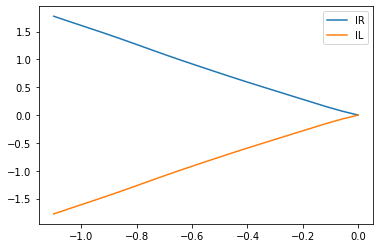

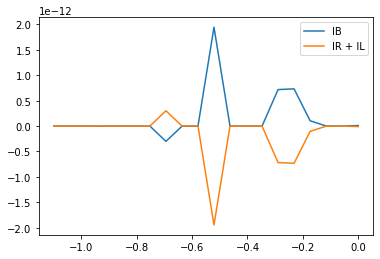

In [35]:
IPbar_list_0,IPbar_list_1, IPbar_list_2 = Self_consistency_Buttiker_V_Probe.currents_list(mubarBs_P_sol_list,
                                                                                          Vbar_list,
                                             ef,nleads,list_tags_transmissions_P,energies,
                                                                                  syst_Sgeom_P)

# $\mu_B(-m,+V)$

In [36]:
muBs_M_sol_list_test = Self_consistency_Buttiker_V_Probe.muB_selfconsistent(ef,V_list,nleads,
                                                                            list_tags_transmissions_M,
                                                                            energies,syst_Sgeom_M,
                                                                          print_bool=False,tol = tol )

--- V = 0.0 --- 
--- mu2,mu3,... =[-5.3]
--- V = 0.05789473684210527 --- 
--- mu2,mu3,... =[-5.30745096]
--- V = 0.11578947368421054 --- 
--- mu2,mu3,... =[-5.31639515]
--- V = 0.1736842105263158 --- 
--- mu2,mu3,... =[-5.32564057]
--- V = 0.23157894736842108 --- 
--- mu2,mu3,... =[-5.33352789]
--- V = 0.2894736842105263 --- 
--- mu2,mu3,... =[-5.34066245]
--- V = 0.3473684210526316 --- 
--- mu2,mu3,... =[-5.34748849]
--- V = 0.4052631578947369 --- 
--- mu2,mu3,... =[-5.35430406]
--- V = 0.46315789473684216 --- 
--- mu2,mu3,... =[-5.3612099]
--- V = 0.5210526315789474 --- 
--- mu2,mu3,... =[-5.36871087]
--- V = 0.5789473684210527 --- 
--- mu2,mu3,... =[-5.37735299]
--- V = 0.636842105263158 --- 
--- mu2,mu3,... =[-5.38572712]
--- V = 0.6947368421052632 --- 
--- mu2,mu3,... =[-5.39185617]
--- V = 0.7526315789473685 --- 
--- mu2,mu3,... =[-5.39722732]
--- V = 0.8105263157894738 --- 
--- mu2,mu3,... =[-5.40236634]
--- V = 0.8684210526315791 --- 
--- mu2,mu3,... =[-5.40691933]
--- V = 0.92

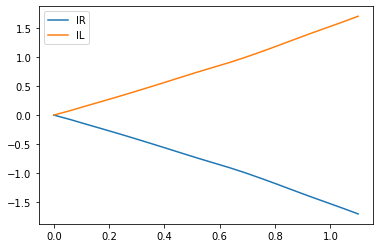

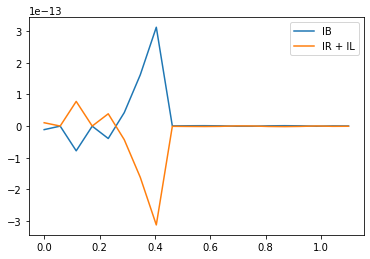

In [37]:
IM_list_0, IM_list_1, IM_list_2 = Self_consistency_Buttiker_V_Probe.currents_list(muBs_M_sol_list_test,V_list,
                                             ef,nleads,list_tags_transmissions_M,energies,
                                                                                  syst_Sgeom_M)

# $\overline{\mu}_B(-m,-V)$

In [38]:
mubarBs_M_sol_list_test = Self_consistency_Buttiker_V_Probe.muB_selfconsistent(ef,Vbar_list,nleads,list_tags_transmissions_M,
                                             energies,syst_Sgeom_M,
                                          print_bool=True,tol = tol)

--- V = -0.0 --- 
[-1.1102230246251565e-14]
[-1.1102230246251565e-14]
[-1.1102230246251565e-14]
[2.4491643912938343e-07]
[-0.015303947343975555]
--- mu2,mu3,... =[-5.3]
--- V = -0.05789473684210527 --- 
[-0.018673599907366167]
[-0.018673599907366167]
[-0.018673599907366167]
[-0.018673354990915936]
[-0.0002049600222568948]
[-1.1644852566661257e-06]
[1.6922019341336636e-11]
[-4.440892098500626e-16]
--- mu2,mu3,... =[-5.29391127]
--- V = -0.11578947368421054 --- 
[-0.02941703061423473]
[-0.02941703061423473]
[-0.02941703061423473]
[-0.029416790035368123]
[0.00015940676795400677]
[-5.41765699635377e-07]
[-2.9820146352221855e-11]
[-4.440892098500626e-16]
--- mu2,mu3,... =[-5.28431729]
--- V = -0.1736842105263158 --- 
[-0.04254993052771017]
[-0.04254993052771017]
[-0.04254993052771017]
[-0.042549688276223296]
[0.0008854939783415894]
[-1.918138979695172e-05]
[-1.0893735025163664e-08]
[1.341149413747189e-13]
--- mu2,mu3,... =[-5.27076265]
--- V = -0.23157894736842108 --- 
[-0.04371842020238503

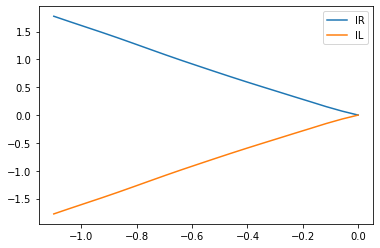

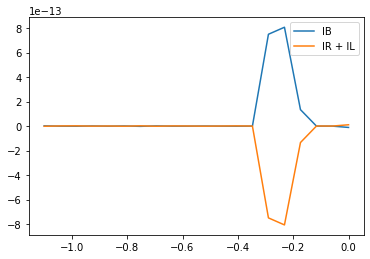

In [39]:
IMbar_list_0,IMbar_list_1, IMbar_list_2 = Self_consistency_Buttiker_V_Probe.currents_list(mubarBs_M_sol_list_test,
                                                                                          Vbar_list,
                                                     ef,nleads,list_tags_transmissions_M,energies,
                                                                                  syst_Sgeom_M)

# $ \Delta I, MR(V)$

In [40]:
dIlist    = np.subtract(IP_list_0,IM_list_0)
dIbarlist = np.subtract(IPbar_list_0,IMbar_list_0)


MR_list    = Self_consistency_Buttiker_V_Probe.calc_MR_list(IP_list_0,IM_list_0,V_list)
MRbar_list = Self_consistency_Buttiker_V_Probe.calc_MR_list(IPbar_list_0,IMbar_list_0,Vbar_list)




# Check that $I_B =0$

<>:16: DeprecationWarning: invalid escape sequence \D
<>:16: DeprecationWarning: invalid escape sequence \D
<>:16: DeprecationWarning: invalid escape sequence \D
<ipython-input-41-4817fa89b405>:16: DeprecationWarning: invalid escape sequence \D
  plt.title('$\Delta I (m)$')


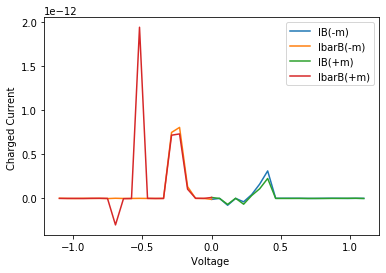

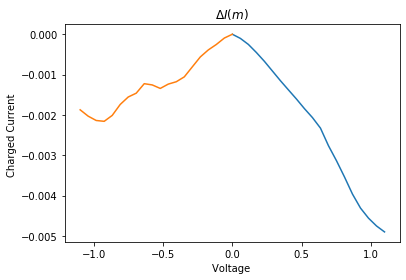

In [41]:
plt.plot(V_list,IM_list_2,label='IB(-m)')
plt.plot(Vbar_list,IMbar_list_2,label='IbarB(-m)')

plt.plot(V_list,IP_list_2,label='IB(+m)')
plt.plot(Vbar_list,IPbar_list_2,label='IbarB(+m)')



plt.xlabel('Voltage ')
plt.ylabel('Charged Current ')
plt.legend()


plt.show()

plt.title('$\Delta I (m)$')
plt.plot(V_list,dIlist)
plt.plot(Vbar_list,dIbarlist)



plt.xlabel('Voltage ')
plt.ylabel('Charged Current ')
# plt.legend()


plt.show()

# Fig 4A : MR

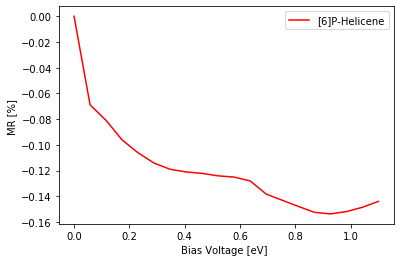

In [42]:


plt.plot(V_list,MR_list,color='red',label = '{}'.format(func_molecule(nrings,chirality_left)))



# Plot labels
plt.xlabel('Bias Voltage [eV] ')
plt.ylabel('MR [%] ')
plt.legend()



plt.show()


# Fig 4b : $\Delta I$ : Even,Odd 

In [43]:
DP_list = np.subtract(IP_list_0,IPbar_list_0)
DM_list = np.subtract(IM_list_0,IMbar_list_0)

In [44]:
RP_list = np.add(IP_list_0,IPbar_list_0)
RM_list = np.add(IM_list_0,IMbar_list_0)

In [45]:
dIList = np.add(
                np.subtract(DP_list,DM_list),
                np.subtract(RP_list,RM_list))

<>:1: DeprecationWarning: invalid escape sequence \D
<>:3: DeprecationWarning: invalid escape sequence \D
<>:5: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
<>:3: DeprecationWarning: invalid escape sequence \D
<>:5: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
<>:3: DeprecationWarning: invalid escape sequence \D
<>:5: DeprecationWarning: invalid escape sequence \D
<ipython-input-46-eb96dcc1c2fe>:1: DeprecationWarning: invalid escape sequence \D
  plt.plot(V_list,np.multiply(0.5,dIList),label="$ \Delta \ I$: total",color='orange')
<ipython-input-46-eb96dcc1c2fe>:3: DeprecationWarning: invalid escape sequence \D
  plt.plot(V_list,np.multiply(0.5,np.subtract(DP_list,DM_list)),label='$ \Delta \ I$: odd',color='red')
<ipython-input-46-eb96dcc1c2fe>:5: DeprecationWarning: invalid escape sequence \D
  plt.plot(V_list,np.multiply(0.5,np.subtract(RP_list,RM_list)),label='$ \Delta \ I$: 

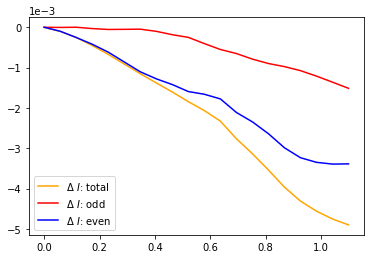

In [46]:


plt.plot(V_list,np.multiply(0.5,dIList),label="$ \Delta \ I$: total",color='orange')

plt.plot(V_list,np.multiply(0.5,np.subtract(DP_list,DM_list)),label='$ \Delta \ I$: odd',color='red')

plt.plot(V_list,np.multiply(0.5,np.subtract(RP_list,RM_list)),label='$ \Delta \ I$: even', color = 'blue')







# plt.xlabel('Bias Voltage [eV] ')
# plt.ylabel('Current [eV] ')
plt.legend()
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))




plt.show()